In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('survey_results_public.csv')
#1.გამოვიტანეთ სასურველი სტრიქონები (1..7)
df.head(7)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",Appropriate in length,Easy,135000.0


# ინდექსირება

In [3]:
#2.დავუნიშნეთ ინდექსირება ცხრილის CompTotal სვეტს
index_data = df.set_index("CompTotal", inplace=True)

In [4]:
df.index

Index([         nan,     285000.0,     250000.0,     156000.0,    1320000.0,
            78000.0,     135000.0,      80000.0,      60000.0,          nan,
       ...
          1200000.0,     135000.0,          nan,    1000000.0,     212021.0,
           200000.0,          nan,          nan,          nan, 3300000000.0],
      dtype='float64', name='CompTotal', length=89184)

In [5]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
      

In [6]:
df["ConvertedCompYearly"]

CompTotal
NaN                  NaN
2.850000e+05    285000.0
2.500000e+05    250000.0
1.560000e+05    156000.0
1.320000e+06     23456.0
                  ...   
2.000000e+05         NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
3.300000e+09         NaN
Name: ConvertedCompYearly, Length: 89184, dtype: float64

# ფილტრები

In [7]:
#3. შევქმენით ორ პარამეტრზე დამოკიდებული ფილტრი, სადაც ვაჩვენებთ იმ ადამიანთა მიერ გამოყენებულ Web framework-სა და სამუშაო გამოცდილების ხანგრძლივობას, რომელთა წლიური შემოსავალი აღებატება 235000-ს და მუშაობენ დისტანციურად. 
annual_remotework_salary = (df['ConvertedCompYearly']>235000) & (df['RemoteWork'].str.contains('Remote'))
df.loc[annual_remotework_salary,['WebframeHaveWorkedWith','WorkExp']]

,WebframeHaveWorkedWith,WorkExp
CompTotal,,
285000.0,Next.js;React;Remix;Vue.js,10.0
360000.0,NaN,NaN
240000.0,Node.js;Vue.js,9.0
350000.0,Gatsby;Next.js;React,NaN
295000.0,ASP.NET CORE,25.0
...,...,...
464000.0,NaN,NaN
353000.0,NaN,NaN
250000.0,React,41.0


# სორტირება

In [8]:
df_list = pd.read_csv('survey_results_schema.csv', index_col='qname')
df_list.head()

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
Q310,QID310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
Q120,QID312,,True,MC,SAVR
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB


In [9]:
#4. დავასორტიროთ ცხრილი ორი პარამეტრის მიხედვით, ქვეყნისა და წლიური შემოსავლის მიხედვით
df.sort_values(by=['Country','ConvertedCompYearly'],ascending=[True,True],inplace=True)
df[['Country', 'ConvertedCompYearly']]


,Country,ConvertedCompYearly
CompTotal,,
123.0,Afghanistan,33.0
3600.0,Afghanistan,41.0
4200.0,Afghanistan,48.0
56666.0,Afghanistan,648.0
69420.0,Afghanistan,794.0
...,...,...
NaN,NaN,NaN
NaN,NaN,NaN
NaN,NaN,NaN


# სტატისტიკური ფუნქციები(mean, standard deviation,median,min,max).

In [10]:
df["ConvertedCompYearly"].head(20)

CompTotal
123.0               33.0
3600.0              41.0
4200.0              48.0
56666.0            648.0
69420.0            794.0
80000.0            915.0
100000.0          1144.0
200000.0          2288.0
210000.0          2403.0
68000.0          68000.0
932464379.0    9203683.0
NaN                  NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
NaN                  NaN
Name: ConvertedCompYearly, dtype: float64

In [11]:
#წლიური შემოსავლის საშუალოს დათვლა
df['ConvertedCompYearly'].mean()

103110.08171765343

In [12]:
#წლიური შემოსავლის სტანდარტული გადახრის დათვლა
df['ConvertedCompYearly'].std()

681418.838711996

In [13]:
#წლიური შემოსავლის მედიანის დათვლა
df['ConvertedCompYearly'].median()

74963.0

In [14]:
#წლიური შემოსავლის მინიმალური მნიშვნელობის დათვლა
df['ConvertedCompYearly'].min()

1.0

In [15]:
#წლიური შემოსავლის მაქსიმალური მნიშვნელობის დათვლა
df['ConvertedCompYearly'].max()

74351432.0

# გრაფიკების აგება

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
df.head(10)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
CompTotal,,,,,,,,,,,,,,,,,,,,,
123.0,2642,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;School or academic work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,3-5 times a week,15-30 minutes a day,30-60 minutes a day,None of these,"Information Services, IT, Software Development...",Too long,Neither easy nor difficult,33.0
3600.0,37956,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Automated testing;Continuous i...,Legal Services,Appropriate in length,Neither easy nor difficult,41.0
4200.0,39427,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Video-based Online Courses;Online challenges (...,...,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,None of these,NaN,Appropriate in length,Neither easy nor difficult,48.0
56666.0,41679,I agree,I am a developer by profession,Under 18 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Primary/elementary school,On the job training,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,648.0
69420.0,53322,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Secondary school (e.g. American high school, G...",Online Courses or Certification;On the job tra...,"Online challenges (e.g., daily or weekly codin...",...,NaN,NaN,NaN,NaN,NaN,NaN,Healthcare,NaN,NaN,794.0
80000.0,36049,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Hobby;Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,10+ times a week,10+ times a week,6-10 times a week,30-60 minutes a day,60-120 minutes a day,None of these,Legal Services,Appropriate in length,Easy,915.0
100000.0,17873,I agree,I am a developer by profession,25-34 years old,"Employed, part-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;On t...,NaN,...,NaN,NaN,NaN,NaN,NaN,DevOps function;Microservices,"Information Services, IT, Software Development...",NaN,NaN,1144.0
200000.0,57362,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Freelance/contract work,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,10+ times a week,30-60 minutes a day,15-30 minutes a day,None of these,NaN,Appropriate in length,Neither easy nor difficult,2288.0
210000.0,1335,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Blogs with tips and tricks;Recorded coding ses...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in len

In [18]:
import matplotlib.pyplot as plt

In [22]:
ages=df['Age'].value_counts(normalize=True)
age_types= ages.index.tolist()
amount =(ages.to_numpy()*100)

<BarContainer object of 8 artists>

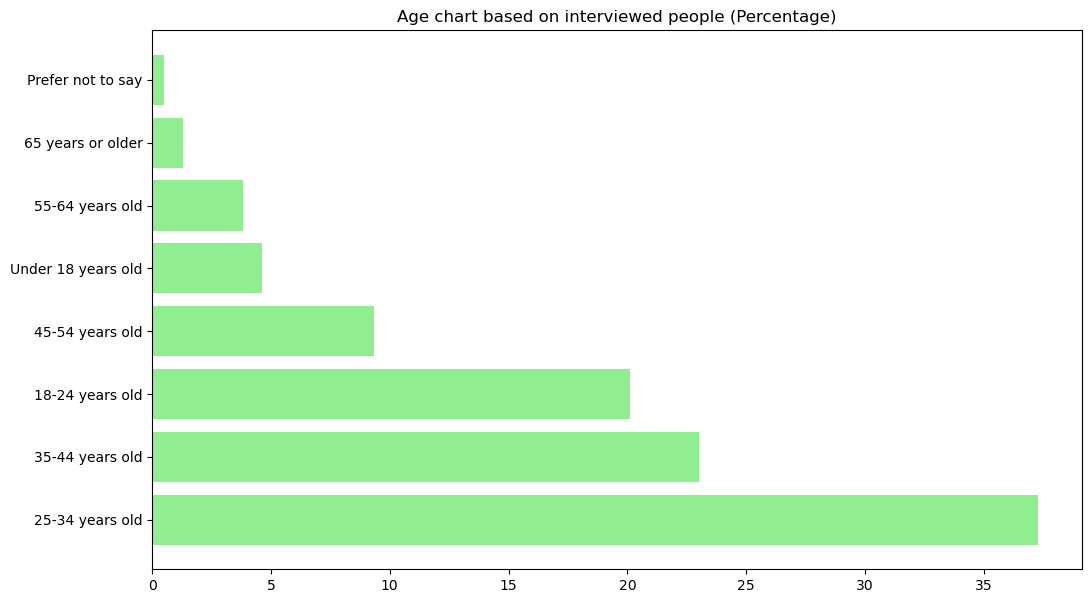

In [23]:
fig, ax = plt.subplots(figsize =(12, 7))
plt.title("Age chart based on interviewed people (Percentage)")
ax.barh(age_types,amount,color="lightgreen")
#გამოკითხულ ადამიანთა ასაკობრივი ჯგუფების რაოდენობა პროცენტებში